In [1]:
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt
from biosppy.signals import eeg

## Save data to csv and generate pdf with graphs

In [2]:
def save_csv_and_plots_to_single_pdf(sample_dir_path, name):
  csv_graphs_path = sample_dir_path
  sample_path = sample_dir_path + name + ".txt"
  filtered = []
  raw = []
  if os.path.exists(csv_graphs_path + name):
    shutil.rmtree(csv_graphs_path + name)
  os.mkdir(csv_graphs_path + name)
  for i in range (0, 6):
    a=np.loadtxt(sample_path)[:,i-6]
    out = eeg.eeg(signal=a, sampling_rate=100., show=False)
    filtered.append(out["filtered"])
    raw.append(out[0])
    np.savetxt(csv_graphs_path + name + '/filtered'+str(i)+'.csv', filtered[i], delimiter=",")
    np.savetxt(csv_graphs_path + name + '/raw'+str(i)+'.csv', filtered[i], delimiter=",")
  fig, axs = plt.subplots(6, 1, figsize=(2000, 20))
  # filtered[4] *= 10
  # filtered[5] *= 10
  for k in range(0, 6):
    axs[k].set_xlim(0, len(filtered[k]))
    axs[k].set_ylim(-500, 500)
    axs[k].plot(filtered[k])
    axs[k].locator_params(nbins=1000, axis='x')
  axs[0].set_title('czoło lewe')
  axs[1].set_title('czolo prawe')
  # axs[2].set_title('środek')
  # axs[3].set_title('tył')
  # axs[4].set_title('czoło lewe')
  # axs[5].set_title('skroń lewa')
  # fig.set_figwidth(655)
  # fig.set_figheight(131)
  fig.savefig(csv_graphs_path + name + '.pdf', bbox_inches='tight')
  plt.close()

In [3]:
sample_dir_path = 'C:/Users/kubaf/PycharmProjects/VR_Sickness_server_app/eeg_data/'
save_csv_and_plots_to_single_pdf(sample_dir_path, "bartek28032024")

## Frequency analysis

In [4]:
from biosppy.signals import eeg

In [5]:
sample_path = 'C:/Users/kubaf/PycharmProjects/VR_Sickness_server_app/eeg_data/'
sample_name = 'bartek28032024.txt'
x=np.transpose(np.loadtxt(sample_path+sample_name)[:,5:11])
data_range = (0, 18000)
data_range2 = (18000, 36000)

In [6]:
len(x[0])

36810

In [7]:
frequencies = [eeg.eeg(signal=i[data_range[0]:data_range[1]], sampling_rate=100., show=False) for i in x]
frequencies2 = [eeg.eeg(signal=i[data_range2[0]:data_range2[1]], sampling_rate=100., show=False) for i in x]
out = eeg.eeg(signal=x[0], sampling_rate=100., show=False)

In [8]:
"""
ts : array
    Signal time axis reference (seconds).
filtered : array
    Filtered EEG signal.
features_ts : array
    Features time axis reference (seconds).
delta : array
    Average power in the 0 to 4 Hz frequency band; each column is one EEG
    channel.
theta : array
    Average power in the 4 to 8 Hz frequency band; each column is one EEG
    channel.
alpha_low : array
    Average power in the 8 to 10 Hz frequency band; each column is one EEG
    channel.
alpha_high : array
    Average power in the 10 to 13 Hz frequency band; each column is one EEG
    channel.
beta : array
    Average power in the 13 to 25 Hz frequency band; each column is one EEG
    channel.
gamma : array
    Average power in the 25 to 40 Hz frequency band; each column is one EEG
    channel.
plf_pairs : list
    PLF pair indices.
plf : array
    PLF matrix; each column is a channel pair.
"""

'\nts : array\n    Signal time axis reference (seconds).\nfiltered : array\n    Filtered EEG signal.\nfeatures_ts : array\n    Features time axis reference (seconds).\ndelta : array\n    Average power in the 0 to 4 Hz frequency band; each column is one EEG\n    channel.\ntheta : array\n    Average power in the 4 to 8 Hz frequency band; each column is one EEG\n    channel.\nalpha_low : array\n    Average power in the 8 to 10 Hz frequency band; each column is one EEG\n    channel.\nalpha_high : array\n    Average power in the 10 to 13 Hz frequency band; each column is one EEG\n    channel.\nbeta : array\n    Average power in the 13 to 25 Hz frequency band; each column is one EEG\n    channel.\ngamma : array\n    Average power in the 25 to 40 Hz frequency band; each column is one EEG\n    channel.\nplf_pairs : list\n    PLF pair indices.\nplf : array\n    PLF matrix; each column is a channel pair.\n'

In [9]:
electrodes_dict = {0 : "czoło lewe",
                   1 : "czoło prawe",
                   2 : "srodek",
                   3 : "tyl",
                   4 : "czolo lewe",
                   5 : "skron lewa"}

In [10]:
def show_plots(name, dir1, electrode=0):
  plt.figure(figsize=(30,3))
  plt.plot(frequencies[electrode][name])
  plt.plot(frequencies2[electrode][name])
  plt.legend(["8000-18000","19000-29000"] )
  plt.title(name + "-" + electrodes_dict[electrode])
  plt.savefig(dir1 + name + "-" + electrodes_dict[electrode] + '.png')

dir1 = "C:/Users/kubaf/PycharmProjects/VR_Sickness_server_app/bartek/"
dir2 = "bartek"

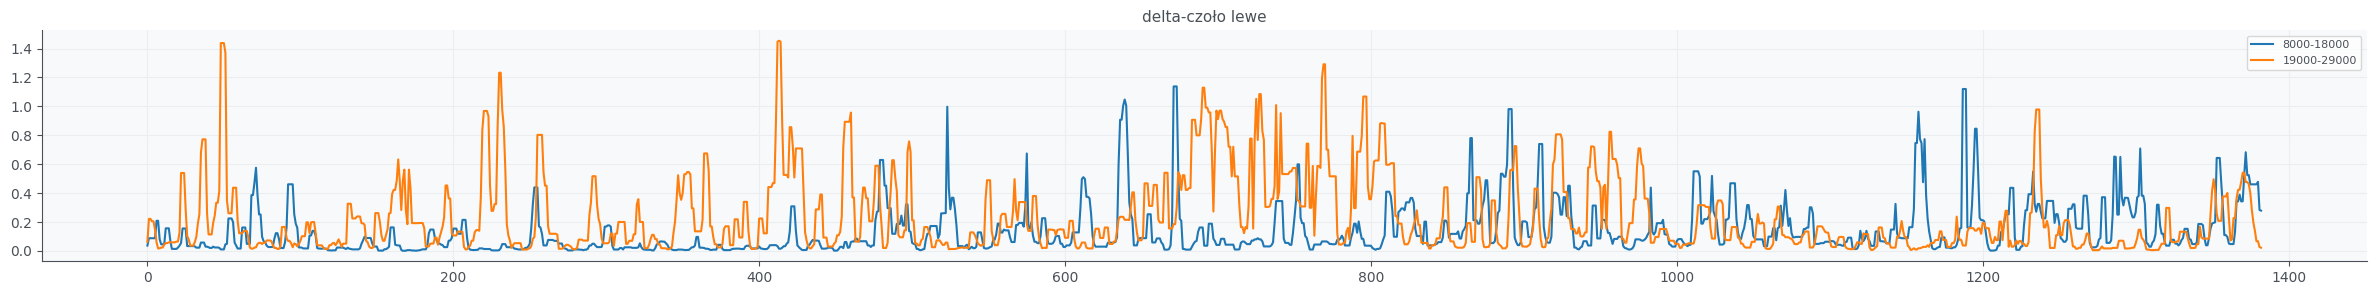

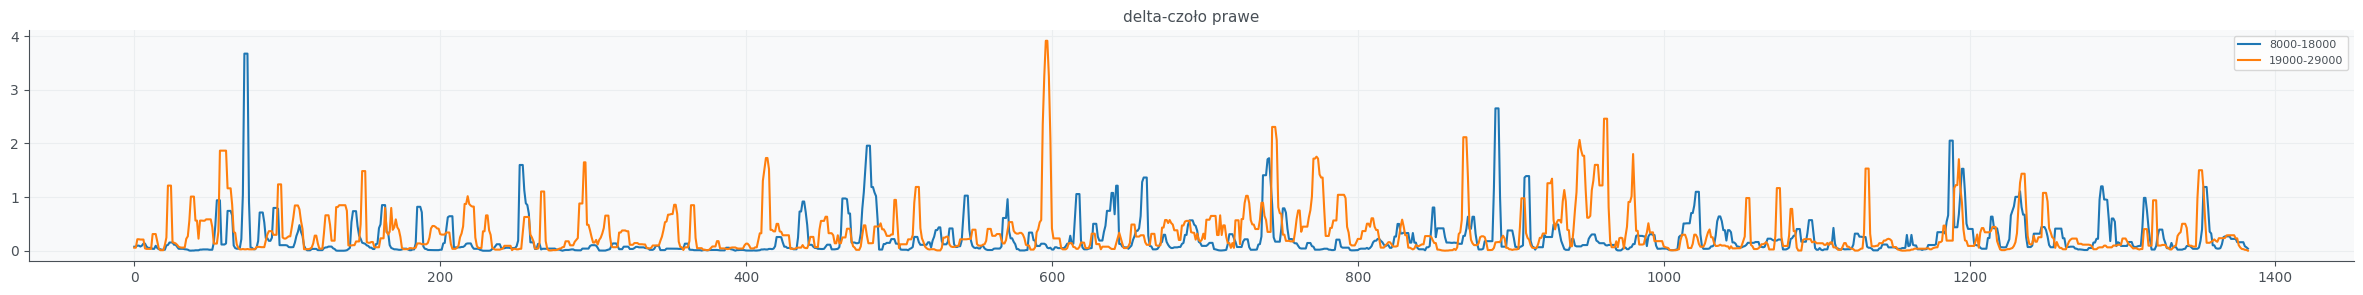

In [11]:
show_plots("delta", dir1, 0)
show_plots("delta", dir1, 1)
# show_plots("delta", dir1, 2)
# show_plots("delta", dir1, 3)
# show_plots("delta", dir1, 4)
# show_plots("delta", dir1, 5)

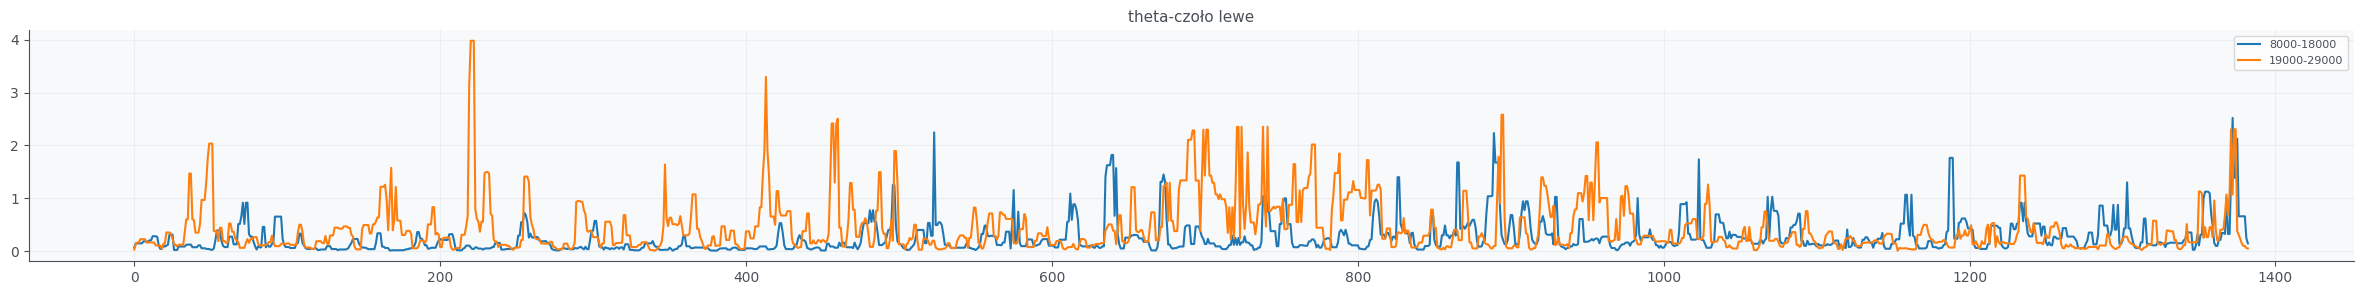

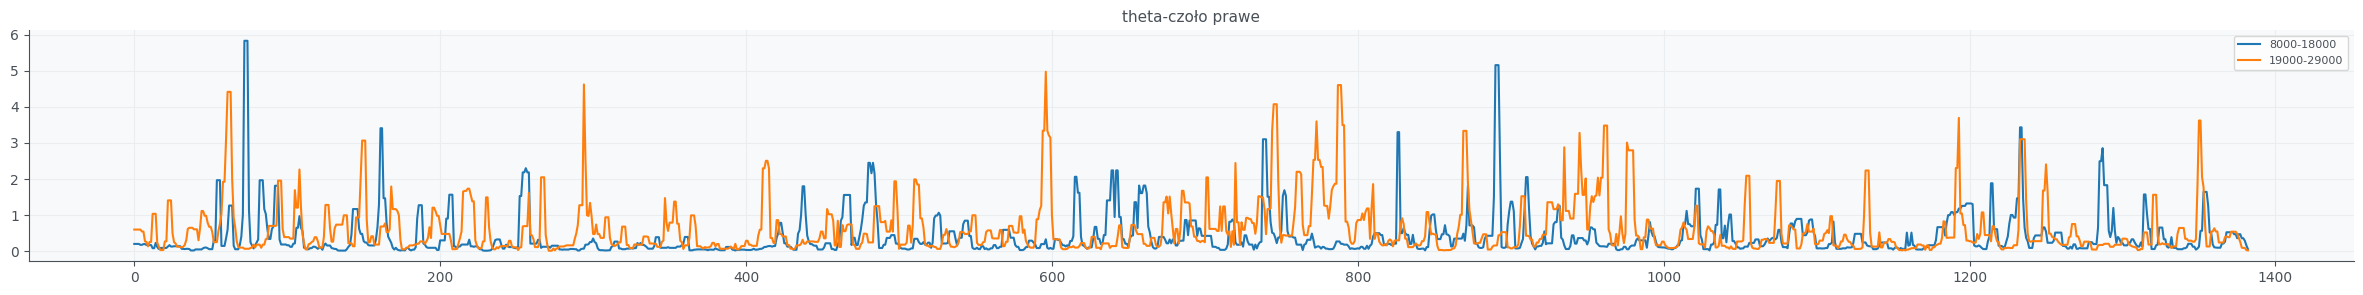

In [12]:
show_plots("theta", dir1, 0)
show_plots("theta", dir1, 1)
# show_plots("theta", dir1, 2)
# show_plots("theta", dir1, 3)
# show_plots("theta", dir1, 4)
# show_plots("theta", dir1, 5)

IndexError: list index out of range

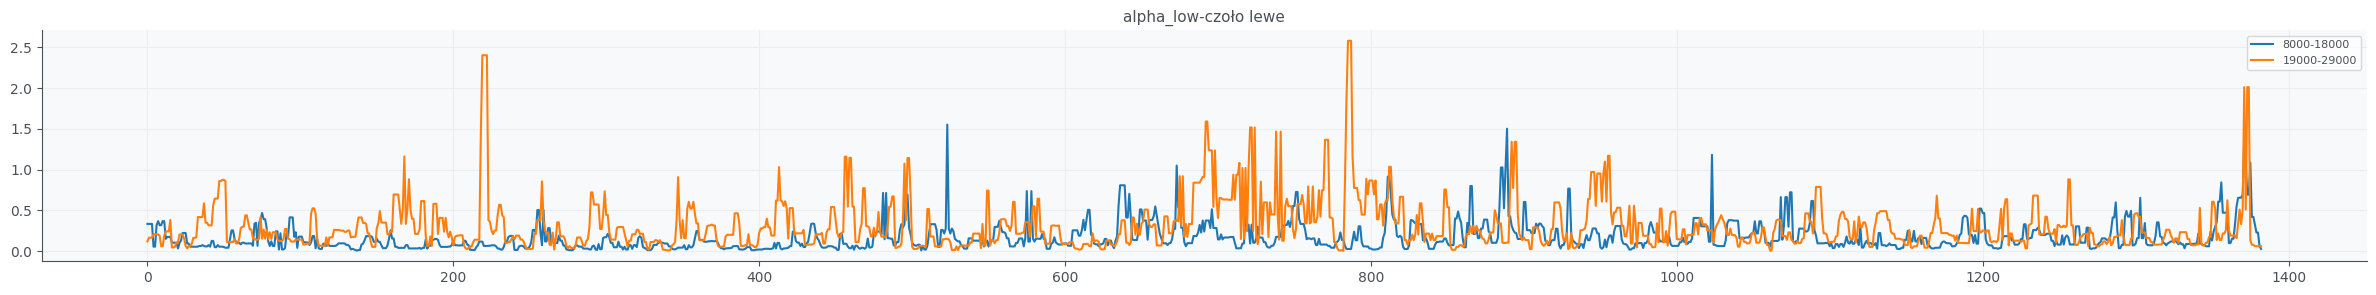

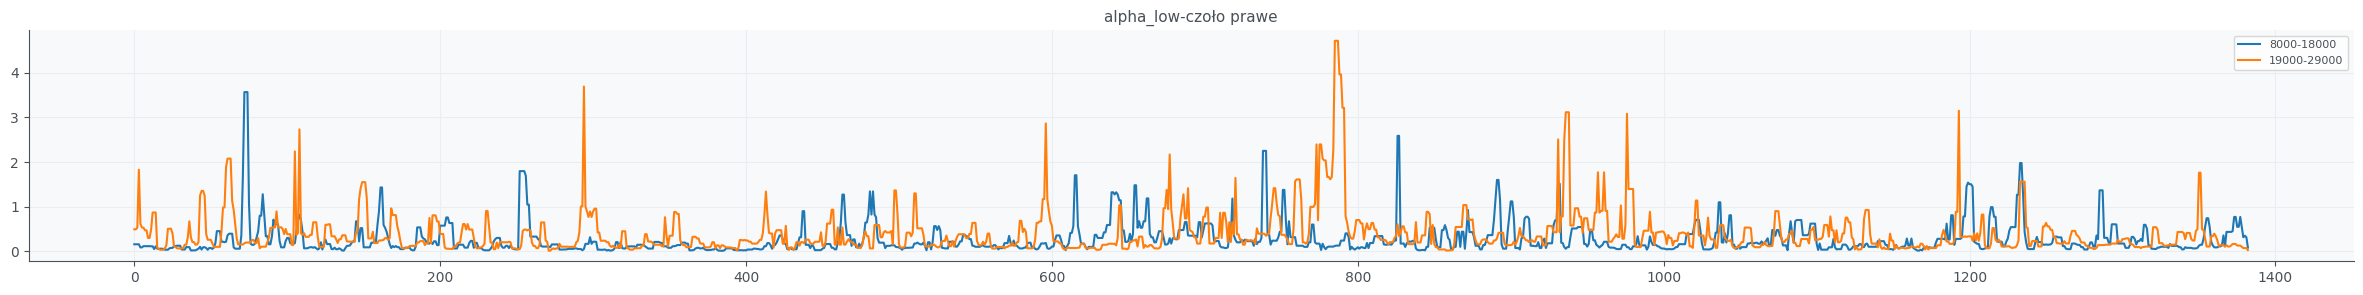

<Figure size 3000x300 with 0 Axes>

In [33]:
show_plots("alpha_low", dir1, 0)
show_plots("alpha_low", dir1, 1)
show_plots("alpha_low", dir1, 2)
show_plots("alpha_low", dir1, 3)
show_plots("alpha_low", dir1, 4)
show_plots("alpha_low", dir1, 5)

IndexError: list index out of range

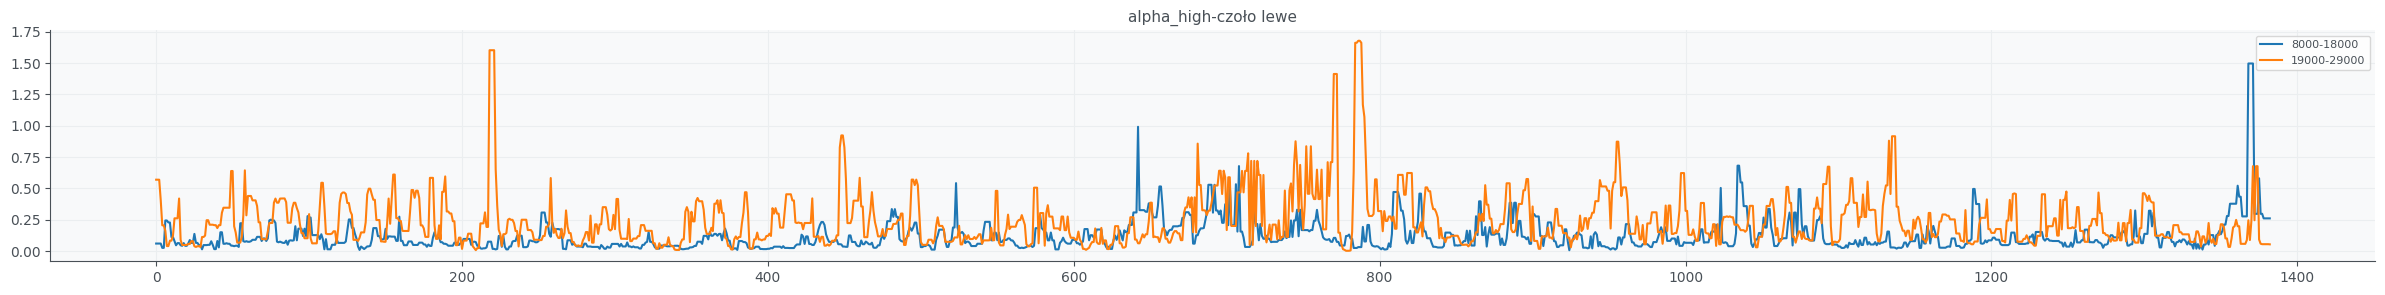

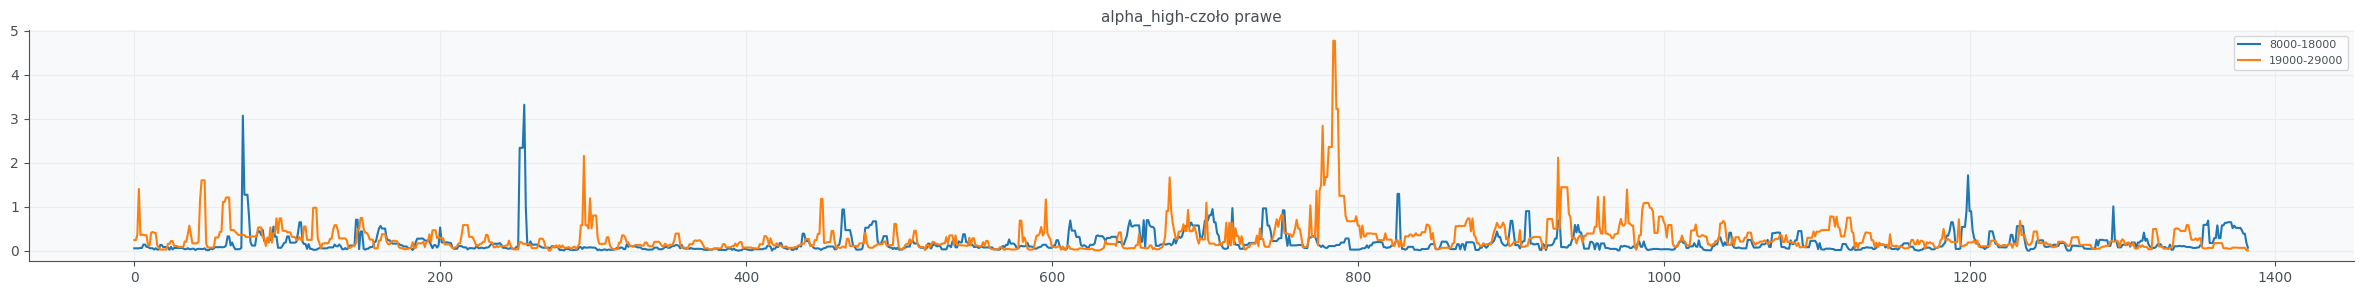

<Figure size 3000x300 with 0 Axes>

In [34]:
show_plots("alpha_high", dir1, 0)
show_plots("alpha_high", dir1, 1)
show_plots("alpha_high", dir1, 2)
show_plots("alpha_high", dir1, 3)
show_plots("alpha_high", dir1, 4)
show_plots("alpha_high", dir1, 5)

IndexError: list index out of range

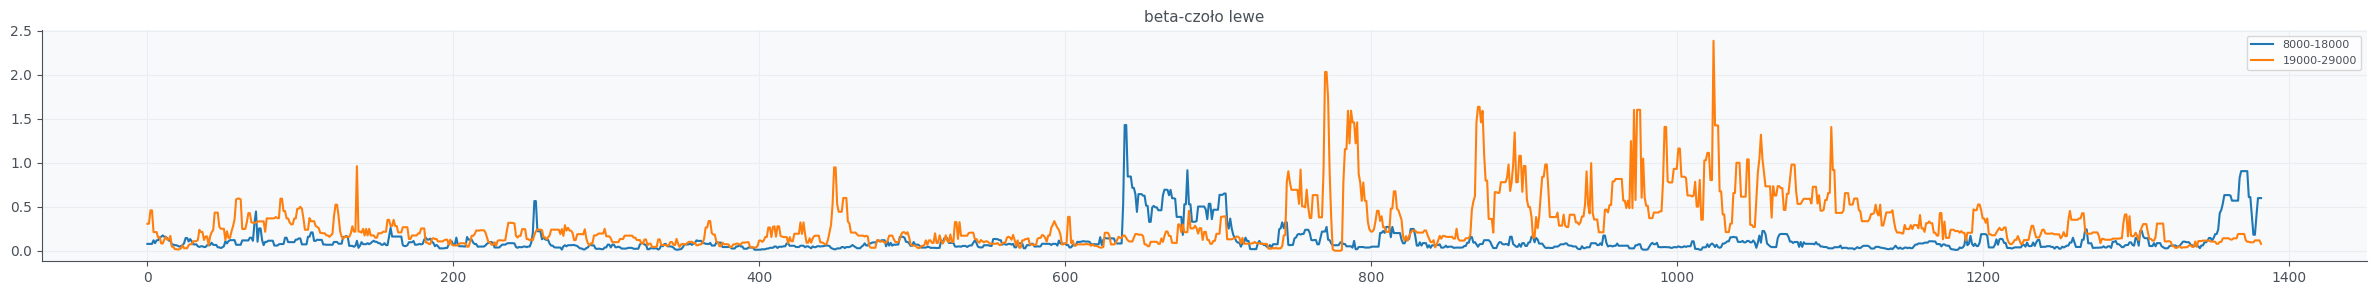

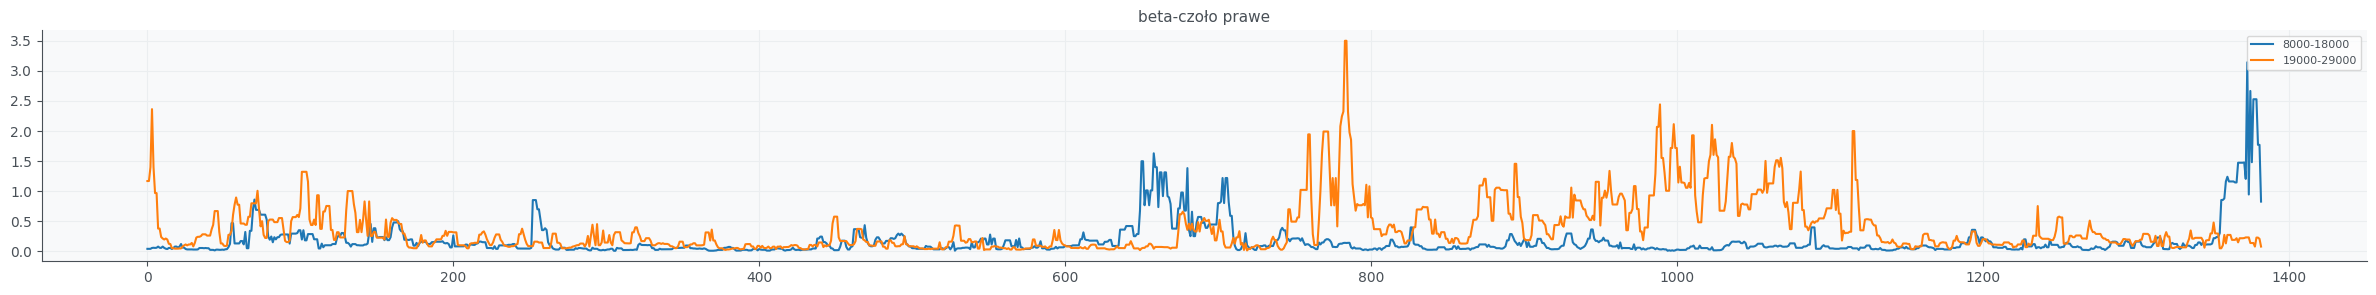

<Figure size 3000x300 with 0 Axes>

In [35]:
show_plots("beta", dir1, 0)
show_plots("beta", dir1, 1)
show_plots("beta", dir1, 2)
show_plots("beta", dir1, 3)
show_plots("beta", dir1, 4)
show_plots("beta", dir1, 5)

IndexError: list index out of range

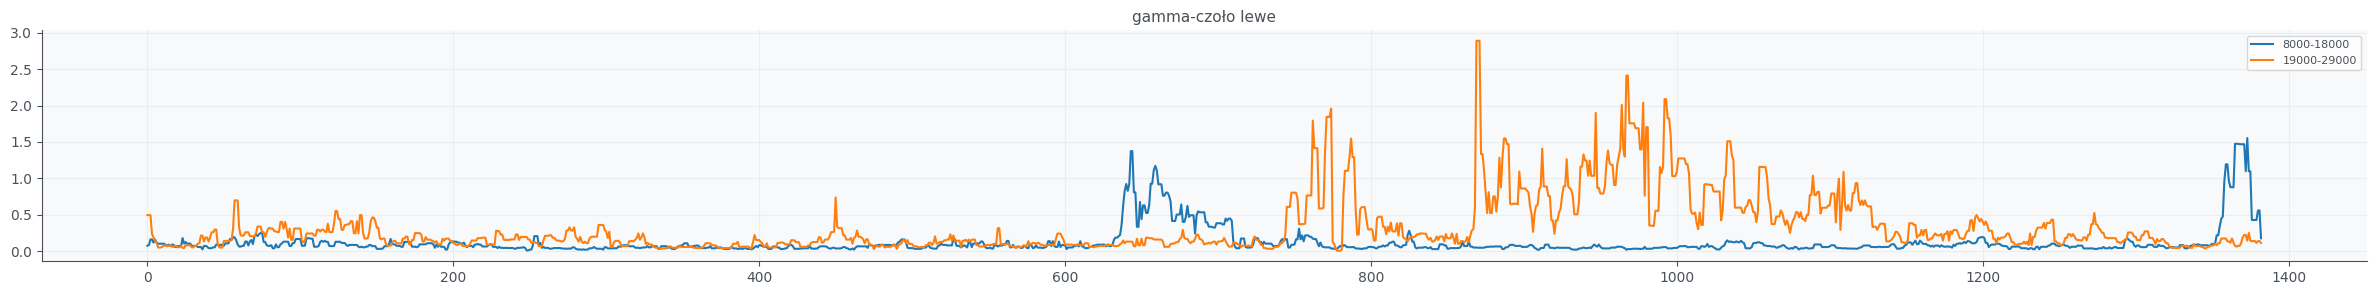

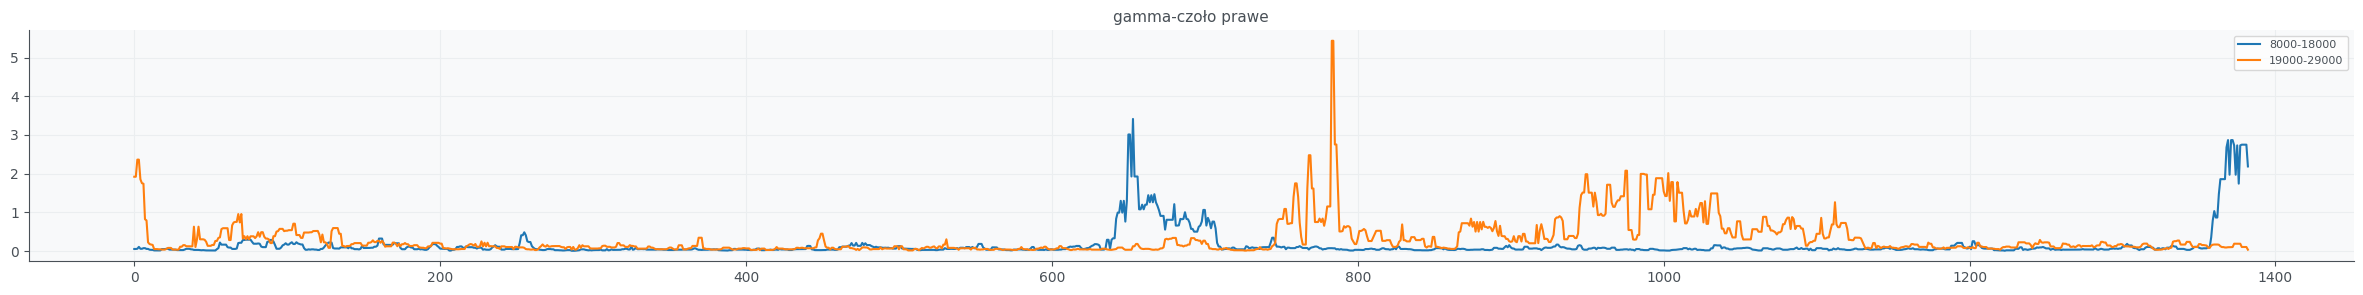

<Figure size 3000x300 with 0 Axes>

In [36]:
show_plots("gamma", dir1, 0)
show_plots("gamma", dir1, 1)
show_plots("gamma", dir1, 2)
show_plots("gamma", dir1, 3)
show_plots("gamma", dir1, 4)
show_plots("gamma", dir1, 5)

Czoło

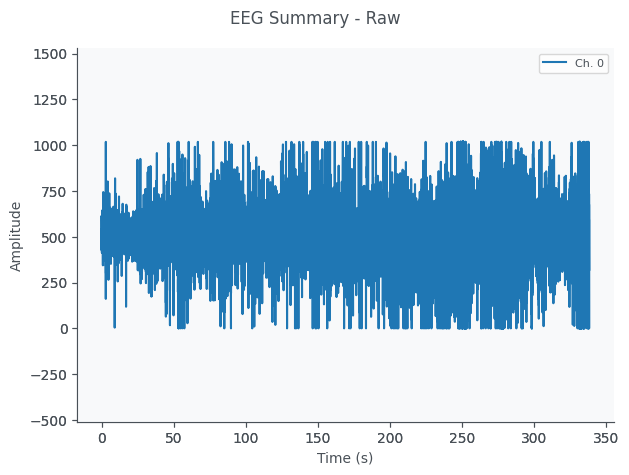

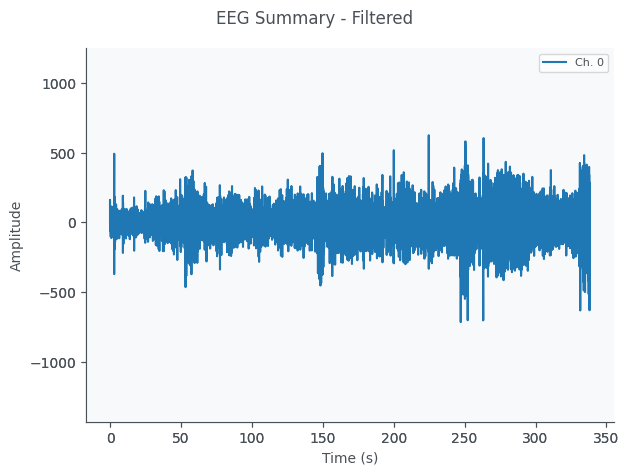

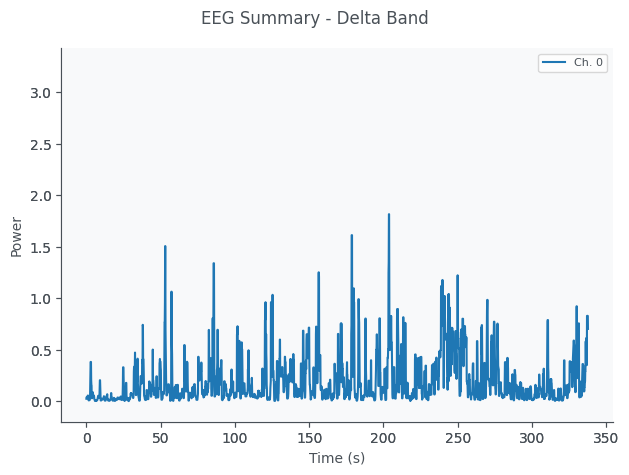

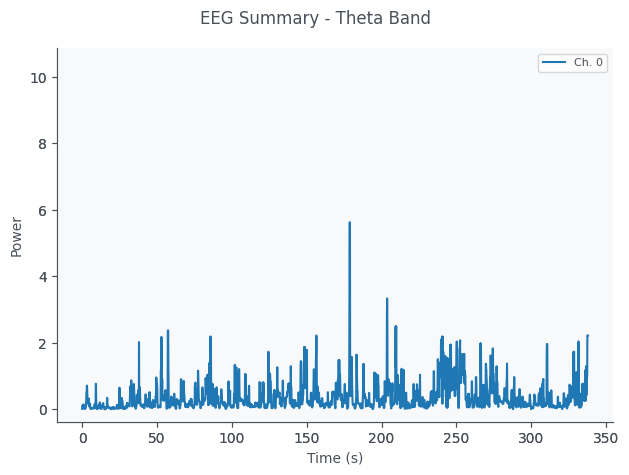

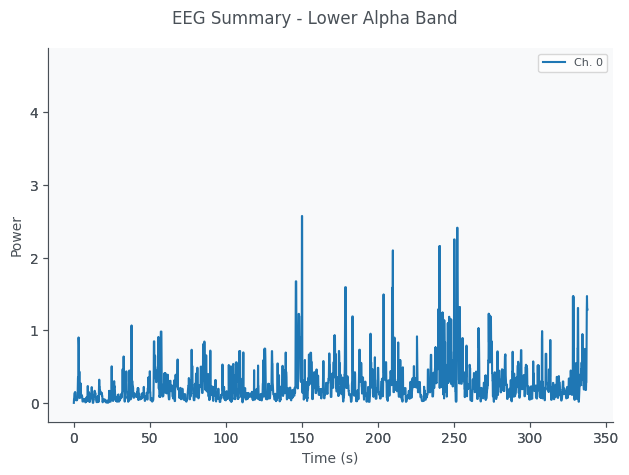

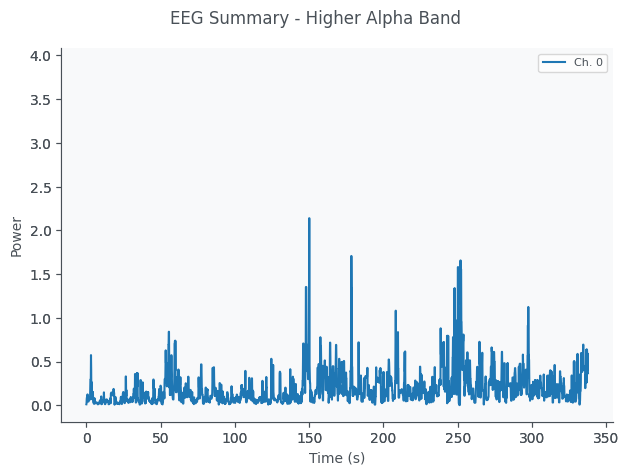

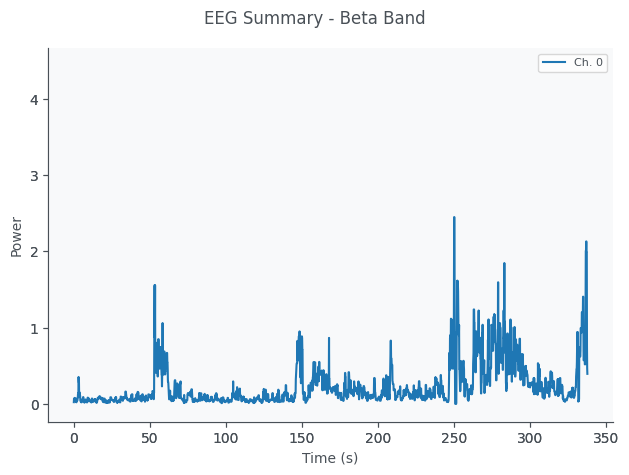

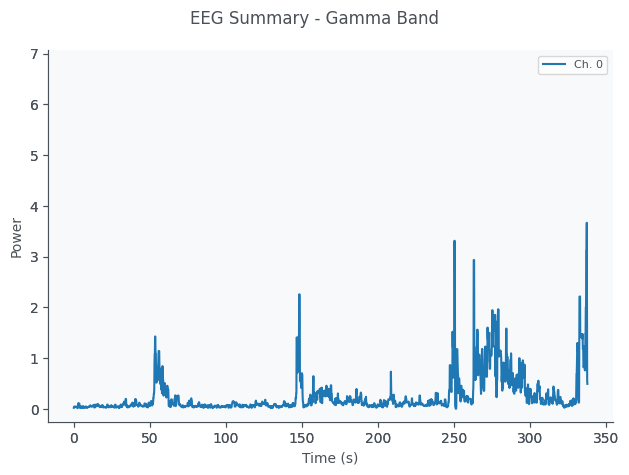

In [50]:
from biosppy.signals import eeg
out = eeg.eeg(signal=x[0][3000:], sampling_rate=100., show=True)